In [1]:
import matplotlib.pyplot as plt
import nashpy as nash
import numpy as np
import pandas as pd
import pathlib

import ambulance_game as abg
from main import (
    get_index_of_values,
    get_matrices,
    get_poa_values_for_given_strategies,
    run_replicator_dynamics_with_penalty,
    plot_asymmetric_replicator_dynamics_with_penalty,
    run_replicator_dynamics_with_dual_parameters,
    get_poa_values_for_given_strategies_dual_parameters,
    plot_asymmetric_replicator_dynamics_with_dual_parameters
)

In [2]:
df = pd.read_csv(pathlib.Path("../data/_parameters/main.csv"))

In [3]:
problem_parameters = {
        "alpha": 0.9,
        "buffer_capacity_1": 5,
        "buffer_capacity_2": 4,
        "lambda_1_1": 4.5,
        "lambda_1_2": 6,
        "lambda_2": 10.7,
        "mu_1": 2,
        "mu_2": 3,
        "num_of_servers_1": 3,
        "num_of_servers_2": 2,
        "system_capacity_1": 6,
        "system_capacity_2": 7,
        "target": 2,
    }

# Reading and scaling matrices

In [4]:
index = get_index_of_values(problem_parameters, atol=1e-1, data=df)
dirname = df.iloc[index[0]]["hash_value"]
R, A, B = get_matrices(dirname)
A += 1
B += 1

# Asymmetric replicator dynamics behaviour - blocking time

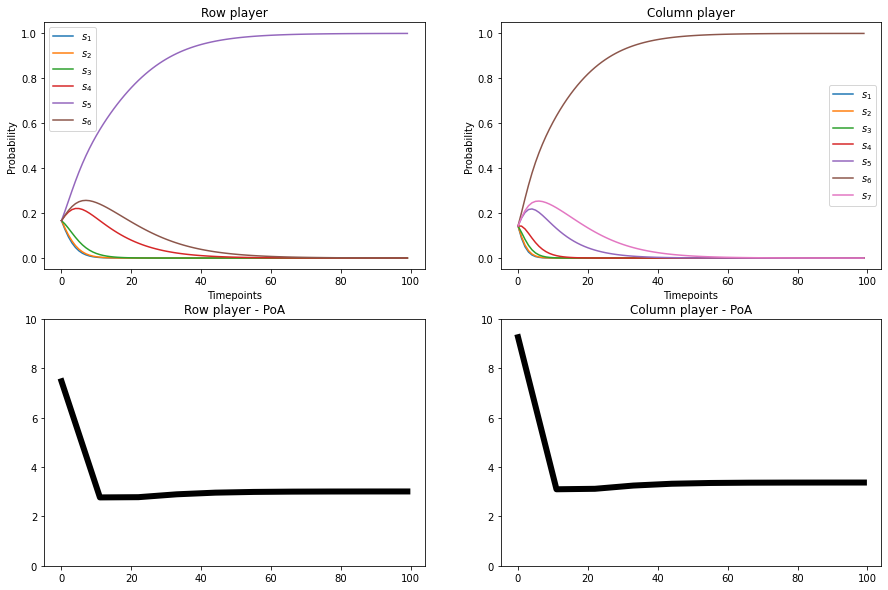

In [64]:
plot_asymmetric_replicator_dynamics_with_penalty(
    R=R, 
    A=A, 
    B=B, 
    problem_parameters=problem_parameters,
    performance_measure_function=abg.markov.get_mean_blocking_time_using_markov_state_probabilities,
    timepoints=np.linspace(1, 100000, 100), 
    penalty=None, 
    poa_plot_min=0, 
    poa_plot_max=10,
)

## Flooding the system

In [65]:
index = get_index_of_values(problem_parameters, atol=1e-1, data=df)
dirname = df.iloc[index[0]]["hash_value"]
R1, A1, B1 = get_matrices(dirname)
A1 += 1
B1 += 1

problem_parameters_2 = problem_parameters.copy()
problem_parameters_2["lambda_2"] = 24
index = get_index_of_values(problem_parameters_2, atol=1e-1, data=df)
dirname = df.iloc[index[0]]["hash_value"]
R2, A2, B2 = get_matrices(dirname)
A2 += 1
B2 += 1

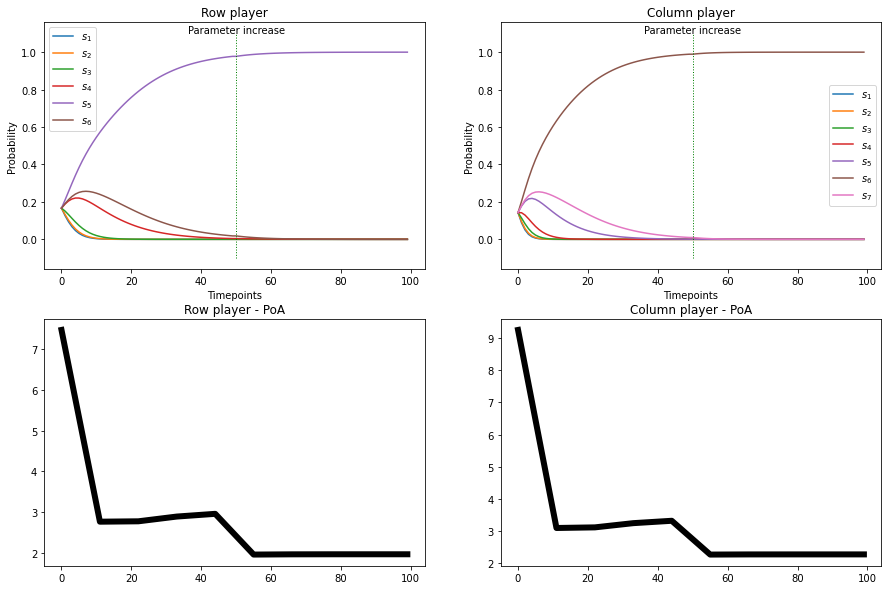

In [66]:
plot_asymmetric_replicator_dynamics_with_dual_parameters(
    R1=R1,
    A1=A1,
    B1=B1,
    R2=R2,
    A2=A2,
    B2=B2,
    timepoints=np.linspace(1, 100000, 100),
    problem_parameters_1=problem_parameters,
    problem_parameters_2=problem_parameters_2,
    x_init=None,
    y_init=None,
    poa_plot_max=None,
    poa_plot_min=None,
    performance_measure_function=abg.markov.get_mean_blocking_time_using_markov_state_probabilities,
)

## Adding resources

In [67]:
index = get_index_of_values(problem_parameters, atol=1e-1, data=df)
dirname = df.iloc[index[0]]["hash_value"]
R1, A1, B1 = get_matrices(dirname)
A1 += 1
B1 += 1

problem_parameters_2 = problem_parameters.copy()
problem_parameters_2["system_capacity_1"] = 7
problem_parameters_2["system_capacity_2"] = 8
index = get_index_of_values(problem_parameters_2, atol=1e-1, data=df)
dirname = df.iloc[index[0]]["hash_value"]
R2, A2, B2 = get_matrices(dirname)
A2 += 1
B2 += 1

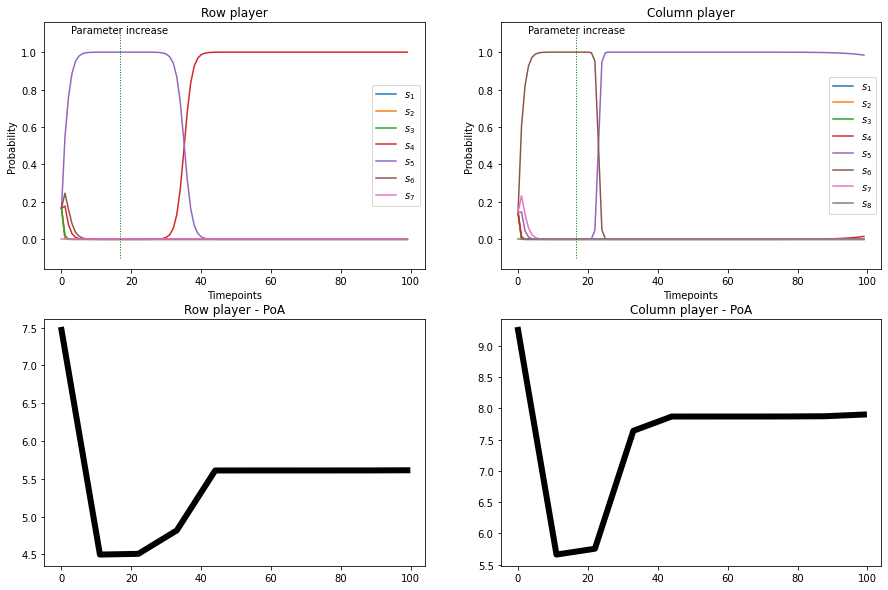

In [71]:
plot_asymmetric_replicator_dynamics_with_dual_parameters(
    R1=R1,
    A1=A1,
    B1=B1,
    R2=R2,
    A2=A2,
    B2=B2,
    timepoints=np.linspace(1, 1000000, 100),
    divide=6,
    problem_parameters_1=problem_parameters,
    problem_parameters_2=problem_parameters_2,
    poa_plot_max=None,
    poa_plot_min=None,
    performance_measure_function=abg.markov.get_mean_blocking_time_using_markov_state_probabilities,
)

**See appendix for general behaviour of increased capacity model**

## Penalise strategies

$$
    A = 
    \begin{pmatrix}
        x & x & x & x \\
        x & x & x & x \\
        x & x & x & x \\    
    \end{pmatrix}, \;
    B = 
    \begin{pmatrix}
        y & y & y & y \\
        y & y & y & y \\
        y & y & y & y \\    
    \end{pmatrix}
$$

$$
    \tilde{A} = 
    \begin{pmatrix}
        x & x & x & x \\
        \rho x & \rho x & \rho x & \rho x \\
        x & x & x & x \\    
    \end{pmatrix}, \;
    \tilde{B} = 
    \begin{pmatrix}
        y & \rho y & y & y \\
        y & \rho y & y & y \\
        y & \rho y & y & y \\    
    \end{pmatrix}
$$

In [5]:
index = get_index_of_values(problem_parameters, atol=1e-1, data=df)
dirname = df.iloc[index[0]]["hash_value"]
R, A, B = get_matrices(dirname)
# A *= 100
# B *= 100
A += 1
B += 1

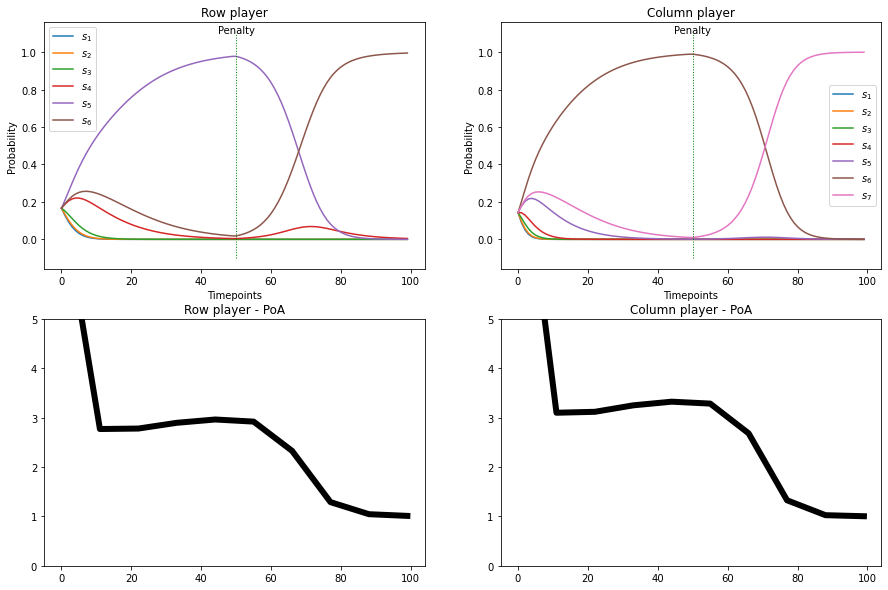

In [57]:
plot_asymmetric_replicator_dynamics_with_penalty(
    R=R,
    A=A,
    B=B,
    problem_parameters=problem_parameters,
    performance_measure_function=abg.markov.get_mean_blocking_time_using_markov_state_probabilities,
    timepoints=np.linspace(1, 100000, 100), 
    penalty=0.9997,
    poa_plot_min=0, 
    poa_plot_max=5,
)

# Asymmetric replicator dynamics behaviour - waiting time

In [19]:
problem_parameters = {
        "alpha": 0.9,
        "buffer_capacity_1": 5,
        "buffer_capacity_2": 4,
        "lambda_1_1": 4.5,
        "lambda_1_2": 6,
        "lambda_2": 10.7,
        "mu_1": 2,
        "mu_2": 3,
        "num_of_servers_1": 3,
        "num_of_servers_2": 2,
        "system_capacity_1": 6,
        "system_capacity_2": 7,
        "target": 2,
    }

In [20]:
index = get_index_of_values(problem_parameters, atol=1e-1, data=df)
dirname = df.iloc[index[0]]["hash_value"]
R, A, B = get_matrices(dirname)
A *= 100
B *= 100

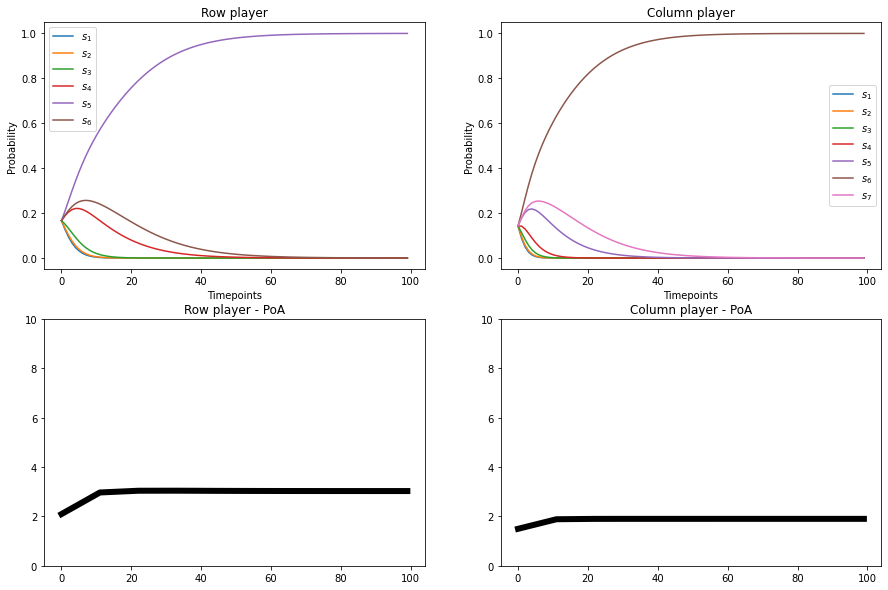

In [21]:
plot_asymmetric_replicator_dynamics_with_penalty(
    R=R, 
    A=A, 
    B=B, 
    problem_parameters=problem_parameters,
    performance_measure_function=abg.markov.get_mean_waiting_time_using_markov_state_probabilities,
    timepoints=np.linspace(1, 1000, 100), 
    penalty=None, 
    poa_plot_min=0, 
    poa_plot_max=10,
)

## FLooding the system

In [22]:
index = get_index_of_values(problem_parameters, atol=1e-1, data=df)
dirname = df.iloc[index[0]]["hash_value"]
R1, A1, B1 = get_matrices(dirname)
A1 *= 100
B1 *= 100

problem_parameters_2 = problem_parameters.copy()
problem_parameters_2["lambda_2"] = 24
index = get_index_of_values(problem_parameters_2, atol=1e-1, data=df)
dirname = df.iloc[index[0]]["hash_value"]
R2, A2, B2 = get_matrices(dirname)
A2 *= 100
B2 *= 100

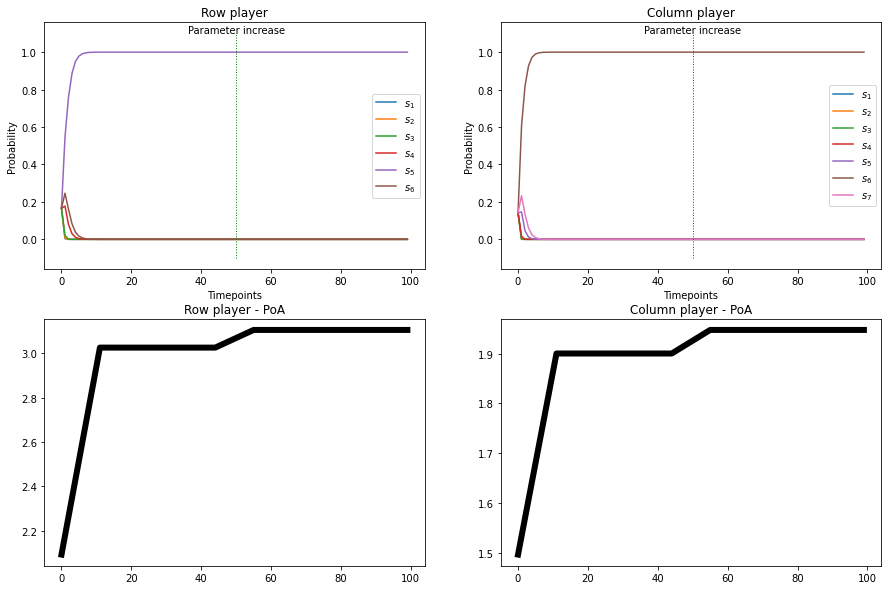

In [23]:
plot_asymmetric_replicator_dynamics_with_dual_parameters(
    R1=R1,
    A1=A1,
    B1=B1,
    R2=R2,
    A2=A2,
    B2=B2,
    timepoints=np.linspace(1, 10000, 100),
    problem_parameters_1=problem_parameters,
    problem_parameters_2=problem_parameters_2,
    poa_plot_max=None,
    poa_plot_min=None,
    performance_measure_function=abg.markov.get_mean_waiting_time_using_markov_state_probabilities,
)

## Adding resources

In [34]:
index = get_index_of_values(problem_parameters, atol=1e-1, data=df)
dirname = df.iloc[index[0]]["hash_value"]
R1, A1, B1 = get_matrices(dirname)

problem_parameters_2 = problem_parameters.copy()
problem_parameters_2["system_capacity_1"] = 7
problem_parameters_2["system_capacity_2"] = 8
index = get_index_of_values(problem_parameters_2, atol=1e-1, data=df)
dirname = df.iloc[index[0]]["hash_value"]
R2, A2, B2 = get_matrices(dirname)

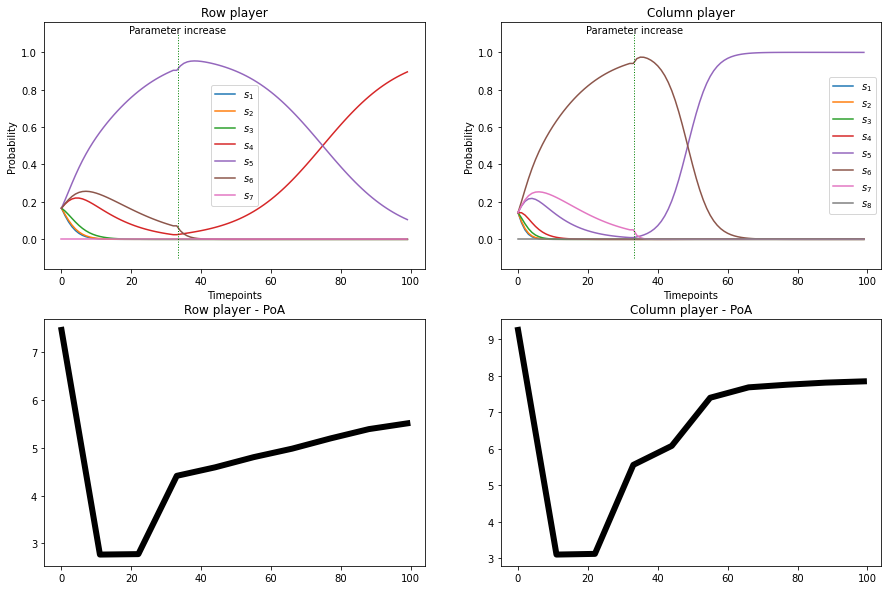

In [36]:
plot_asymmetric_replicator_dynamics_with_dual_parameters(
    R1=R1,
    A1=A1,
    B1=B1,
    R2=R2,
    A2=A2,
    B2=B2,
    divide=3,
    timepoints=np.linspace(1, 100000, 100),
    problem_parameters_1=problem_parameters,
    problem_parameters_2=problem_parameters_2,
    poa_plot_max=None,
    poa_plot_min=None,
    performance_measure_function=abg.markov.get_mean_blocking_time_using_markov_state_probabilities,
)

## Penalise strategy

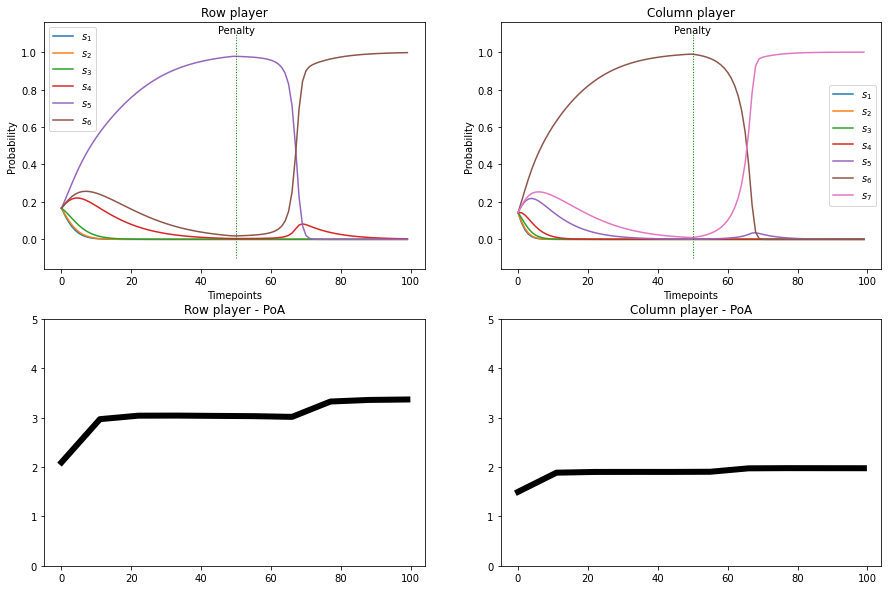

In [13]:
plot_asymmetric_replicator_dynamics_with_penalty(
    R=R, 
    A=A, 
    B=B, 
    problem_parameters=problem_parameters,
    performance_measure_function=abg.markov.get_mean_waiting_time_using_markov_state_probabilities,
    timepoints=np.linspace(1, 1000, 100), 
    penalty=100, 
    poa_plot_min=0, 
    poa_plot_max=5,
)

# Appendix

## 1. General behaviour of increased capacity model

In [34]:
problem_parameters = {
        "alpha": 0.9,
        "buffer_capacity_1": 5,
        "buffer_capacity_2": 4,
        "lambda_1_1": 4.5,
        "lambda_1_2": 6,
        "lambda_2": 10.7,
        "mu_1": 2,
        "mu_2": 3,
        "num_of_servers_1": 3,
        "num_of_servers_2": 2,
        "system_capacity_1": 6,
        "system_capacity_2": 7,
        "target": 2,
    }

In [37]:
index = get_index_of_values(problem_parameters, atol=1e-1, data=df)
dirname = df.iloc[index[0]]["hash_value"]
R1, A1, B1 = get_matrices(dirname)

problem_parameters_2 = problem_parameters.copy()
problem_parameters_2["system_capacity_1"] = 7
problem_parameters_2["system_capacity_2"] = 8
index = get_index_of_values(problem_parameters_2, atol=1e-1, data=df)
dirname = df.iloc[index[0]]["hash_value"]
R2, A2, B2 = get_matrices(dirname)

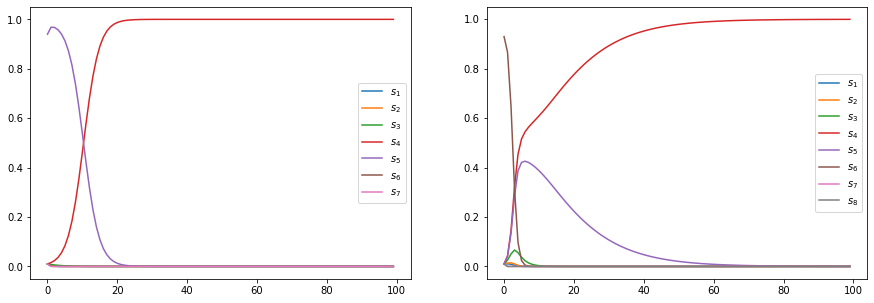

In [38]:
game = nash.Game(A2, B2)
xs, ys = game.asymmetric_replicator_dynamics(
    timepoints=np.linspace(0, 500000, 100), 
    x0=np.array([.01, .01, .01, .01, .94, .01, .01]),
    y0=np.array([.01, .01, .01, .01, .01, .93, .01, .01]),
)
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(xs)
plt.legend([f"$s_{i + 1}$" for i in range(7)])
plt.subplot(1, 2, 2)
plt.plot(ys)
plt.legend([f"$s_{i + 1}$" for i in range(8)])

## 2. Example with larger model

In [273]:
problem_parameters = {
        "buffer_capacity_1": 4,
        "buffer_capacity_2": 3,
        "mu_1": 6.773554,
        "mu_2": 2.216548,
        "num_of_servers_1": 9,      # 9 servers
        "num_of_servers_2": 9,      # 9 servers
        "system_capacity_1": 10,    # 10 capacity
        "system_capacity_2": 9,     # 9 capacity
        "alpha": 0.95,
        "lambda_1_1": 15.2,
        "lambda_1_2": 14.9,
        "lambda_2": 36.0,
        "target": 1,
    }

In [277]:
index = get_index_of_values(problem_parameters, atol=1e-1, data=df)
dirname = df.iloc[index[0]]["hash_value"]
R, A, B = get_matrices(dirname)

In [279]:
A

array([[-0.00238694, -0.00238694, -0.00238694, -0.00238694, -0.00238694,
        -0.00238694, -0.00238694, -0.00238694, -0.00238694],
       [-0.00238694, -0.00238694, -0.00238694, -0.00238694, -0.00238694,
        -0.00238694, -0.00238694, -0.00238694, -0.00238694],
       [-0.00238694, -0.00238694, -0.00238694, -0.00238694, -0.00238694,
        -0.00238694, -0.00238694, -0.00238694, -0.00238694],
       [-0.00238693, -0.00238693, -0.00238693, -0.00238693, -0.00238693,
        -0.00238693, -0.00238693, -0.00238693, -0.00238693],
       [-0.00238692, -0.00238692, -0.00238692, -0.00238692, -0.00238692,
        -0.00238692, -0.00238692, -0.00238692, -0.00238692],
       [-0.00238688, -0.00238688, -0.00238688, -0.00238688, -0.00238688,
        -0.00238688, -0.00238688, -0.00238688, -0.00238689],
       [-0.00238677, -0.00238677, -0.00238677, -0.00238677, -0.00238678,
        -0.00238678, -0.00238679, -0.0023868 , -0.00238682],
       [-0.00238647, -0.00238647, -0.00238647, -0.00238647, -0

In [317]:
B

array([[-0.00347919, -0.00347919, -0.00347919, -0.00347919, -0.00347919,
        -0.00347919, -0.00347919, -0.00347919, -0.00347919],
       [-0.00347919, -0.00347919, -0.00347919, -0.00347919, -0.00347919,
        -0.00347919, -0.00347919, -0.00347919, -0.00347919],
       [-0.00347919, -0.00347919, -0.00347919, -0.00347919, -0.00347919,
        -0.00347919, -0.00347919, -0.00347919, -0.00347919],
       [-0.00347919, -0.00347919, -0.00347919, -0.00347919, -0.00347919,
        -0.00347919, -0.00347919, -0.00347919, -0.00347919],
       [-0.00347919, -0.00347919, -0.00347919, -0.00347919, -0.00347919,
        -0.00347919, -0.00347919, -0.00347919, -0.00347919],
       [-0.00347919, -0.00347919, -0.00347919, -0.00347919, -0.00347919,
        -0.00347919, -0.00347919, -0.00347919, -0.00347919],
       [-0.00347919, -0.00347919, -0.00347919, -0.00347919, -0.00347919,
        -0.00347919, -0.00347919, -0.00347919, -0.00347919],
       [-0.00347919, -0.00347919, -0.00347919, -0.00347919, -0

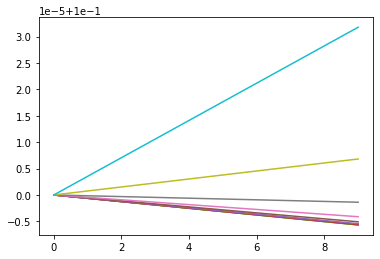

In [314]:
d1, d2 = nash.Game(A,B).asymmetric_replicator_dynamics(timepoints=np.linspace(1, 100, 10))
plt.plot(d1)

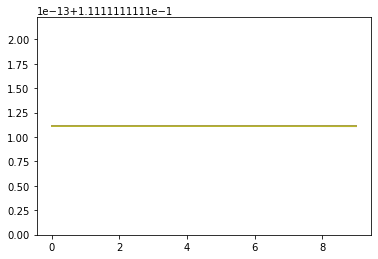

In [315]:
plt.plot(d2)

## 3. Another exaple (addition instead of scaling) - waiting time

In [37]:
problem_parameters = {
        "alpha": 0.9,
        "buffer_capacity_1": 7,
        "buffer_capacity_2": 4,
        "lambda_1_1": 1.0,
        "lambda_1_2": 4.9,
        "lambda_2": 21.3,
        "mu_1": 4.2,
        "mu_2": 6.6,
        "num_of_servers_1": 1,
        "num_of_servers_2": 3,
        "system_capacity_1": 2,
        "system_capacity_2": 6,
        "target": 1,
    }

In [38]:
index = get_index_of_values(problem_parameters, atol=1e-1, data=df)
dirname = df.iloc[index[0]]["hash_value"]
R, A, B = get_matrices(dirname)
A += 1
B += 1

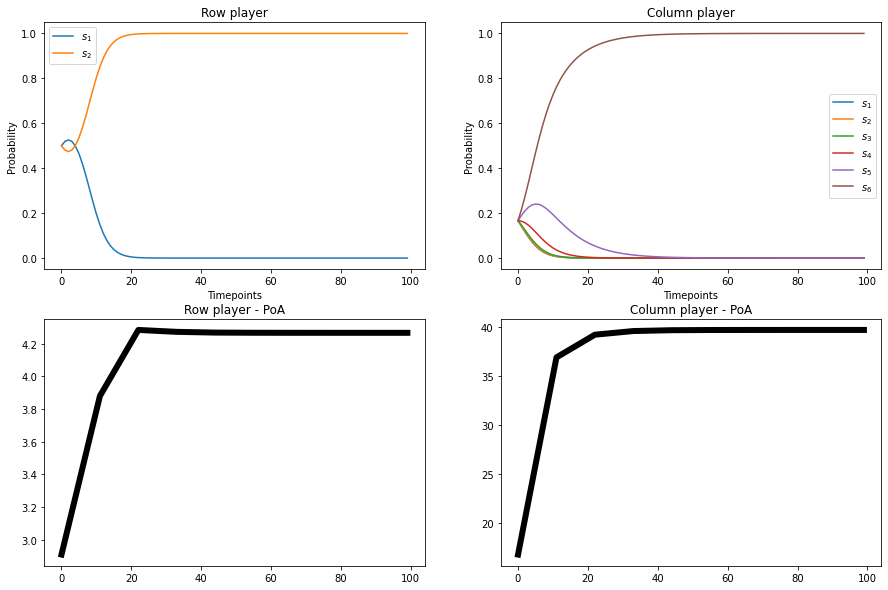

In [41]:
plot_asymmetric_replicator_dynamics_with_penalty(
    R=R, 
    A=A, 
    B=B, 
    problem_parameters=problem_parameters,
    performance_measure_function=abg.markov.get_mean_waiting_time_using_markov_state_probabilities,
    timepoints=np.linspace(0, 200000, 100), 
    penalty=None, 
    poa_plot_min=None, 
    poa_plot_max=None,
)

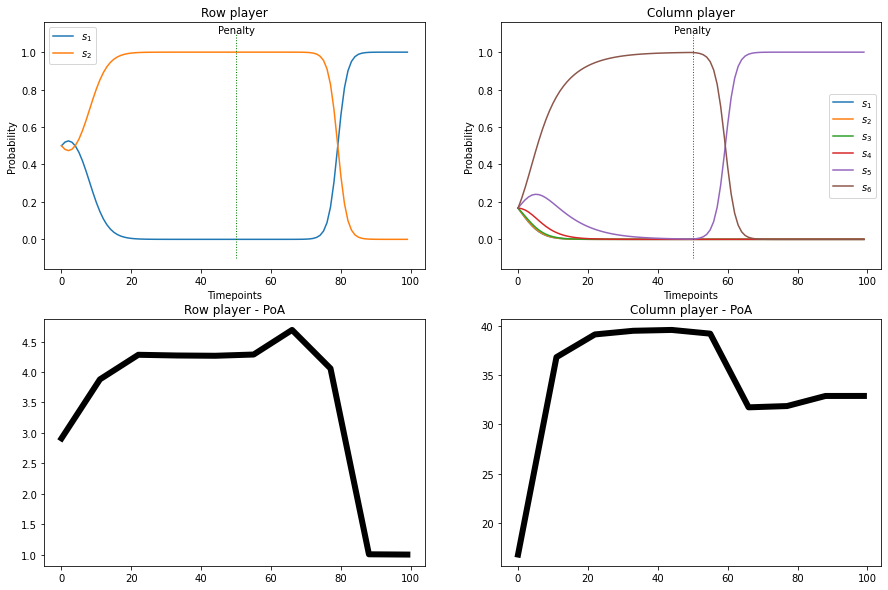

In [42]:
plot_asymmetric_replicator_dynamics_with_penalty(
    R=R, 
    A=A, 
    B=B, 
    problem_parameters=problem_parameters,
    performance_measure_function=abg.markov.get_mean_waiting_time_using_markov_state_probabilities,
    timepoints=np.linspace(0, 200000, 100), 
    penalty=0.9996, 
    poa_plot_min=None, 
    poa_plot_max=None,
)

## 3. Issue with asymmetric replicator dynamics

In [38]:
problem_parameters = {
        "alpha": 0.9,
        "buffer_capacity_1": 7,
        "buffer_capacity_2": 4,
        "lambda_1_1": 1.0,
        "lambda_1_2": 4.9,
        "lambda_2": 21.3,
        "mu_1": 4.2,
        "mu_2": 6.6,
        "num_of_servers_1": 1,
        "num_of_servers_2": 3,
        "system_capacity_1": 2,
        "system_capacity_2": 6,
        "target": 1,
    }
index = get_index_of_values(problem_parameters, atol=1e-1, data=df)
dirname = df.iloc[index[0]]["hash_value"]
R, A, B = get_matrices(dirname)

In [39]:
A

array([[-0.00050514, -0.00050514, -0.00050514, -0.00050514, -0.00050514,
        -0.00050514],
       [-0.0007705 , -0.00071238, -0.00056314, -0.00053245, -0.00047844,
        -0.00028032]])

In [40]:
B

array([[-0.00236188, -0.00235826, -0.00234432, -0.00228569, -0.00221157,
        -0.00214314],
       [-0.00236188, -0.0023583 , -0.00234467, -0.00228815, -0.00221752,
        -0.00215414]])

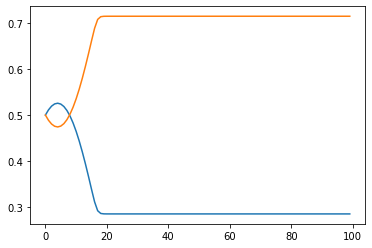

In [31]:
xs, ys = nash.Game(A, B).asymmetric_replicator_dynamics(timepoints=np.linspace(0, 100000, 100))
plt.plot(xs)

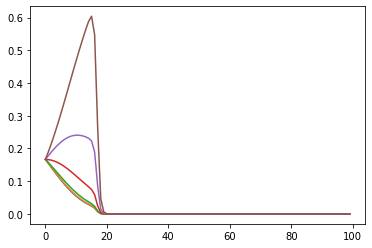

In [32]:
plt.plot(ys)

In [33]:
A += 1
B += 1

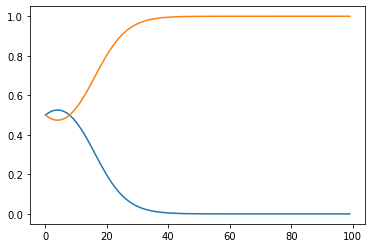

In [34]:
xs, ys = nash.Game(A, B).asymmetric_replicator_dynamics(timepoints=np.linspace(0, 100000, 100))
plt.plot(xs)

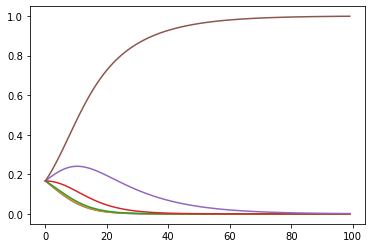

In [35]:
plt.plot(ys)